In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [4]:
# 데이터 로딩
df = pd.read_csv("C:\\Users\\LG\\Downloads\\AAME.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [15]:
# Open 컬럼에서 0 아닌 데이터만 필터링
df_filtered = df[df['Open'] != 0.0].reset_index(drop=True)
open_values = df_filtered[['Open']].values

In [18]:
# 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(open_values)


In [20]:
# 데이터 분할
TEST_SIZE = 50
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-(TEST_SIZE + 30):]  # window 고려

In [22]:
# 시계열 데이터 생성 함수
def make_sample(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i + window])
        y.append(data[i + window])
    return np.array(X), np.array(y)

window_size = 30
X_train, y_train = make_sample(train_data, window_size)
X_test, y_test = make_sample(test_data, window_size)

In [24]:
# LSTM 입력 형태 변환
X_train = X_train.reshape(-1, window_size, 1)
X_test = X_test.reshape(-1, window_size, 1)

In [35]:
from tensorflow.keras.layers import Input

# LSTM 모델 정의
model = Sequential()
model.add(Input(shape=(window_size, 1)))
model.add(LSTM(16, activation='tanh'))
model.add(Dense(1))

# 컴파일 및 학습
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# 예측
pred = model.predict(X_test)

Epoch 1/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 0.0030
Epoch 2/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 2.1010e-04
Epoch 3/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 1.7680e-04
Epoch 4/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 2.2588e-04
Epoch 5/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 1.7001e-04
Epoch 6/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 1.3659e-04
Epoch 7/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 1.5699e-04
Epoch 8/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 1.5628e-04
Epoch 9/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 1.5925e-04
Epoch 10/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 1.3740e-04
Epoch 11/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 1.4406e-04
Epoch 12/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 1.2656e-04
Epoch 13/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 1.2514e-04
Epoch 14/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 9s 1

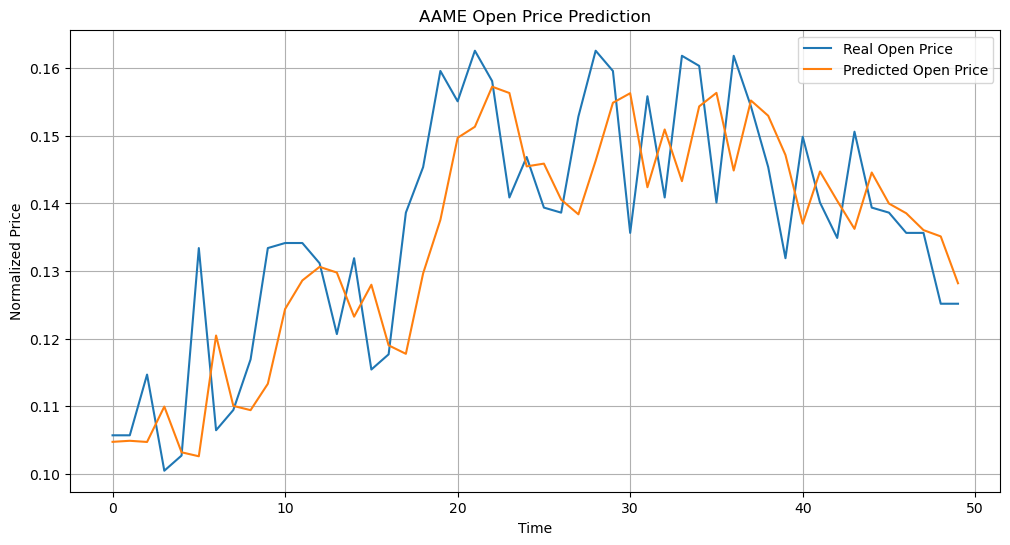

In [36]:
# 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Real Open Price')
plt.plot(pred, label='Predicted Open Price')
plt.title("AAME Open Price Prediction")
plt.xlabel("Time")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()